# [CDAF] Atividade 3

## Nome e matrícula
Nome: Antônio Caetano Neves Neto

Matrícula: 2022043698

## Referências
- [1] https://figshare.com/collections/Soccer_match_event_dataset/4415000
- [2] https://socceraction.readthedocs.io/en/latest/api/generated/socceraction.spadl.wyscout.convert_to_actions.html
- [3] https://github.com/TomDecroos/matplotsoccer
- [4] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PlottingShots.html
- [5] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PlottingPasses.html
- [6] https://soccermatics.readthedocs.io/en/latest/gallery/lesson1/plot_PassNetworks.html

## Questão 1
- Baixe o dataset 'Wyscout Europa Top 5 2017/2018' em [1].
- Escolha uma partida e carregue os dados de eventos em um dataframe do pandas.
- Converta os dados de eventos para SPADL [2].

In [1]:
import json
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(30)

In [5]:
with open("events/events_World_Cup.json", "r") as src:
    data = json.load(src)

In [55]:
df_teams = pd.read_json("teams.json").set_index("wyId", drop=True)
df_teams.head()

,city,name,officialName,area,type
wyId,,,,,
1613,Newcastle upon Tyne,Newcastle United,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
692,Vigo,Celta de Vigo,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
691,Barcelona,Espanyol,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
696,Vitoria-Gasteiz,Deportivo Alav\u00e9s,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
695,Valencia,Levante,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [26]:
with open("players.json", "r") as src:
    players_data = json.load(src)

df_players = pd.DataFrame(players_data).set_index("wyId", drop=True)
df_players.head()

,passportArea,weight,firstName,middleName,lastName,currentTeamId,birthDate,height,role,birthArea,foot,shortName,currentNationalTeamId
wyId,,,,,,,,,,,,,
32777,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",78,Harun,,Tekin,4502,1989-06-17,187,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'Turkey', 'id': '792', 'alpha3code': ...",right,H. Tekin,4687
393228,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",73,Malang,,Sarr,3775,1999-01-23,182,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",left,M. Sarr,4423
393230,"{'name': 'France', 'id': '250', 'alpha3code': ...",72,Over,,Mandanda,3772,1998-10-26,176,"{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...","{'name': 'France', 'id': '250', 'alpha3code': ...",,O. Mandanda,null
32793,"{'name': 'Senegal', 'id': '686', 'alpha3code':...",82,Alfred John Momar,,N'Diaye,683,1990-03-06,187,"{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...","{'name': 'France', 'id': '250', 'alpha3code': ...",right,A. N'Diaye,19314
393247,"{'name': 'France', 'id': '250', 'alpha3code': ...",84,Ibrahima,,Konat\u00e9,2975,1999-05-25,192,"{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...","{'name': 'France', 'id': '250', 'alpha3code': ...",right,I. Konat\u00e9,null


In [36]:
df_tag2name = pd.read_csv("tag_2name.csv").set_index("Tag", drop=True)
df_tag2name.head()

,Label,Description
Tag,,
101,Goal,Goal
102,own_goal,Own goal
301,assist,Assist
302,keyPass,Key pass
1901,counter_attack,Counter attack


In [73]:
i = 0
match_id = data[0]["matchId"]

while match_id == data[i]["matchId"]:
    i += 1

match_events = pd.DataFrame(data[:i])
match_events = match_events.rename(
    columns={
        "id": "event_id", 
        "eventId": "type_id", 
        "subEventId": "subtype_id", 
        "matchPeriod": "period_id", 
        "eventSec": "milliseconds", 
        "playerId": "player_id",
        "matchId": "game_id",
        "eventName": "event_name"
})
match_events["milliseconds"] *= 1000
match_events["team_id"] = match_events["teamId"]
match_events["player_name"] = match_events["player_id"].apply(lambda x: df_players.loc[x, "shortName"])
match_events["team_name"] = match_events["team_id"].apply(lambda x: df_teams.loc[x, "name"])
match_events["results"] = match_events["tags"].apply(lambda v:" - ".join([df_tag2name.loc[tag["id"], "Label"] for tag in v if tag["id"]]))

match_events.head()

,type_id,subEventName,tags,player_id,positions,game_id,event_name,teamId,period_id,milliseconds,subtype_id,event_id,team_id,player_name,team_name,results
0,8,Simple pass,[{'id': 1801}],122671,"[{'y': 50, 'x': 50}, {'y': 53, 'x': 35}]",2057954,Pass,16521,1H,1656.214,85,258612104,16521,Mohammad Al Sahlawi,Saudi Arabia,accurate
1,8,High pass,[{'id': 1801}],139393,"[{'y': 53, 'x': 35}, {'y': 19, 'x': 75}]",2057954,Pass,16521,1H,4487.814,83,258612106,16521,Abdullah Otayf,Saudi Arabia,accurate
2,1,Air duel,"[{'id': 703}, {'id': 1801}]",103668,"[{'y': 81, 'x': 25}, {'y': 83, 'x': 37}]",2057954,Duel,14358,1H,5937.411,10,258612077,14358,I. Kutepov,Russia,won - accurate
3,1,Air duel,"[{'id': 701}, {'id': 1802}]",122940,"[{'y': 19, 'x': 75}, {'y': 17, 'x': 63}]",2057954,Duel,16521,1H,6406.961,10,258612112,16521,Yasir Al Shahrani,Saudi Arabia,lost - not accurate
4,8,Simple pass,[{'id': 1801}],122847,"[{'y': 17, 'x': 63}, {'y': 15, 'x': 71}]",2057954,Pass,16521,1H,8562.167,85,258612110,16521,Salman Al Faraj,Saudi Arabia,accurate


In [74]:
events_name_dict = match_events[["type_id", "event_name"]].set_index("type_id").to_dict()["event_name"]
events_id_dict = dict(map(reversed, match_events["event_id"].to_dict().items()))

events_name_dict

{8: 'Pass',
 1: 'Duel',
 3: 'Free Kick',
 2: 'Foul',
 7: 'Others on the ball',
 10: 'Shot',
 9: 'Save attempt',
 6: 'Offside'}

In [75]:
from socceraction.spadl.wyscout import convert_to_actions

# Como é uma copa do mundo, o time da casa é definido de forma randômica
home_team_id = np.random.choice(match_events["teamId"].unique())

spadl = convert_to_actions(match_events, home_team_id)

In [76]:
spadl_selected = spadl[spadl["original_event_id"].notna()].reset_index(drop=True)

spadl_selected["type_name"] = spadl_selected["original_event_id"].apply(lambda x: events_name_dict[match_events.loc[events_id_dict[x]]["type_id"]])
spadl_selected["player_name"] = spadl_selected["original_event_id"].apply(lambda x: match_events.loc[events_id_dict[x], "player_name"])
spadl_selected["team_name"] = spadl_selected["original_event_id"].apply(lambda x: match_events.loc[events_id_dict[x], "team_name"])
spadl_selected["results"] = spadl_selected["original_event_id"].apply(lambda x: match_events.loc[events_id_dict[x], "results"])

spadl_selected.head()

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,bodypart_id,type_id,result_id,action_id,type_name,player_name,team_name,results
0,2057954,1H,1.656214,16521,122671,52.50,34.00,68.25,36.04,258612104,0,0,1,0,Pass,Mohammad Al Sahlawi,Saudi Arabia,accurate
1,2057954,1H,4.487814,16521,139393,68.25,36.04,26.25,12.92,258612106,0,0,1,1,Pass,Abdullah Otayf,Saudi Arabia,accurate
2,2057954,1H,8.562167,16521,122847,38.85,11.56,30.45,10.20,258612110,0,0,1,3,Pass,Salman Al Faraj,Saudi Arabia,accurate
3,2057954,1H,10.991292,16521,122832,30.45,10.20,8.40,7.48,258612113,0,0,1,4,Pass,Salem Al Dawsari,Saudi Arabia,accurate
4,2057954,1H,15.039163,16521,122847,12.60,7.48,12.60,8.84,258612116,0,0,1,6,Pass,Salman Al Faraj,Saudi Arabia,accurate


## Questão 2
- Visualize uma sequência de 5 ações da partida usando matplotsoccer.actions [3].

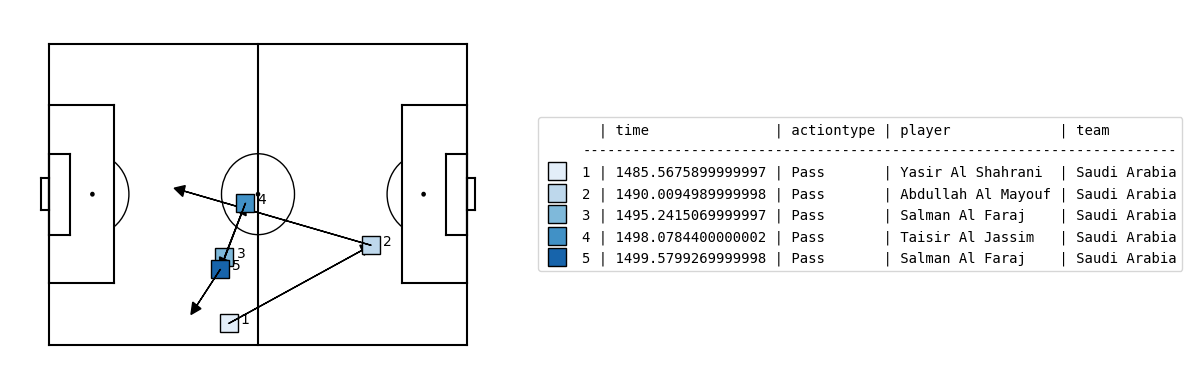

In [80]:
import matplotsoccer

idx = np.random.choice(np.arange(0, len(spadl)-5))

actions = spadl_selected.loc[idx:idx+4, :]

matplotsoccer.actions(
    location=actions[["start_x", "start_y", "end_x", "end_y"]],
    action_type=actions.type_id,
    team=actions.team_name,
    label=actions[["time_seconds", "type_name", "player_name", "team_name"]],
    labeltitle=["time","actiontype","player","team"],
    zoom=False
)

## Questão 3
- Visualize as finalizações da partida a partir do dataframe SPADL. Faça um plot para cada time. Adapte de [4].
- Qual time teve as melhores chances da partida? Por quê?

In [104]:
from mplsoccer import Pitch, Sbopen, VerticalPitch
shots_events = spadl_selected[spadl_selected["type_name"] == "Shot"]

shots_events.loc[:, "start_x"] = shots_events["start_x"]*1.1428
shots_events.loc[:, "start_y"] = shots_events["start_y"]*1.1764

shots_events.loc[:, "end_x"] = shots_events["end_x"]*1.1428
shots_events.loc[:, "end_y"] = shots_events["end_y"]*1.1764

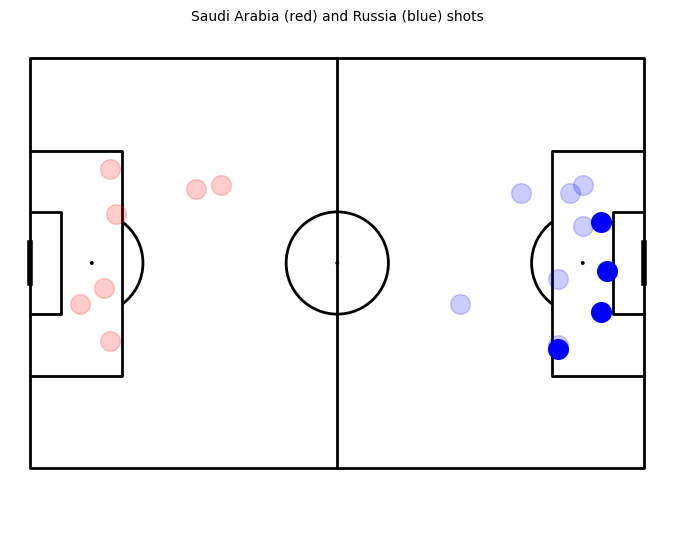

In [105]:
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.5, title_height=0.01, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

df_team_one = shots_events[shots_events["team_id"] == 16521]
for i, row in df_team_one.iterrows():
    if row.result_id == 1: 
        pitch.scatter(row.start_x, row.start_y, alpha=1, s = 200, color = "red", ax=ax["pitch"])
        continue
    pitch.scatter(row.start_x, row.start_y, alpha=0.2, s = 200, color = "red", ax=ax["pitch"])

df_team_two = shots_events[shots_events["team_id"] == 14358]
for i, row in df_team_two.iterrows():
    if row.result_id == 1:
        pitch.scatter(row.start_x, row.start_y, alpha=1, s = 200, color = "blue", ax=ax["pitch"])
        continue
    pitch.scatter(row.start_x, row.start_y, alpha=0.2, s = 200, color = "blue", ax=ax["pitch"])

ax["title"].set_title(f"{df_teams.loc[16521, 'name']} (red) and {df_teams.loc[14358, 'name']} (blue) shots", fontsize = 10)
plt.show()

**O time com as melhores chances foi a Rússia, onde teve 3 oportunidades bem claras de gol, ambas perto da área, nas quais foi obtido o gol. Fato interessante é que o resultado real da partida foi 5x0, mas devido ao SPADL provavelmente ter retirado instâncias não acuradas, tornou a remoção de um  gol nos dados, ou porque o gol faltante não foi por um chute.**

## Questão 4
- Escolha um jogador da partida que você escolheu.
- Faça um heatmap de todas ações dele [3].
- Faça um heatmap de todas as ações ofensivas dele [3].
- Faça um heatmap de todas as ações defensivas dele [3].
- O que você pode inferir sobre o comportamento do jogador? A localização de suas ações varia muito do ataque para a defesa?

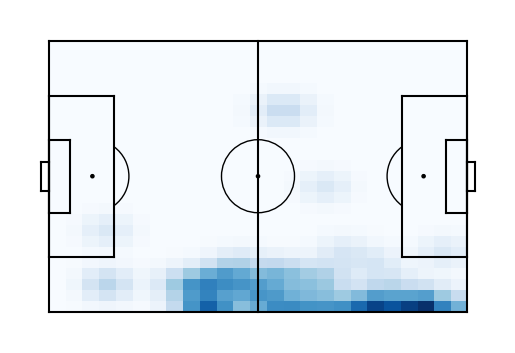

In [134]:
player_id = 41123

x = spadl_selected[spadl_selected["player_id"] == player_id]["start_x"]
y = spadl_selected[spadl_selected["player_id"] == player_id]["start_y"]

hm = matplotsoccer.count(x,y,n=25,m=25) # Construct a 25x25 heatmap from x,y-coordinates
hm = scipy.ndimage.gaussian_filter(hm, 1) # blur the heatmap
matplotsoccer.heatmap(hm) # plot the heatmap
plt.show()

(17,)


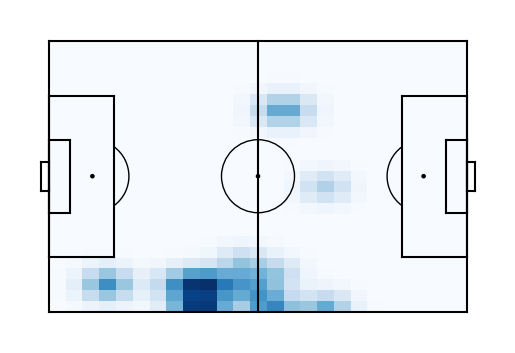

In [120]:
x_defensive = spadl_selected[(spadl_selected["player_id"] == player_id) & (spadl_selected["end_x"] < 52.5)]["start_x"]
y_defensive = spadl_selected[(spadl_selected["player_id"] == player_id) & (spadl_selected["end_x"] < 52.5)]["start_y"]

print(x_defensive.shape)

hm = matplotsoccer.count(x_defensive,y_defensive,n=25,m=25) 
hm = scipy.ndimage.gaussian_filter(hm, 1) 
matplotsoccer.heatmap(hm) 
plt.show()

(32,)


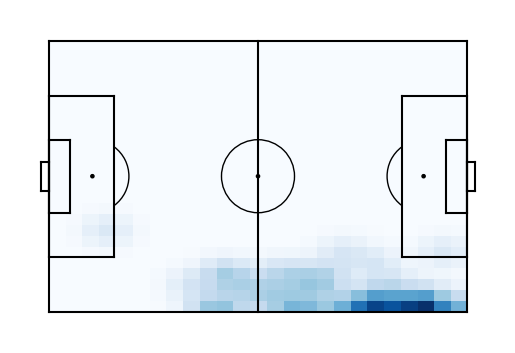

In [121]:
x_offensive = spadl_selected[(spadl_selected["player_id"] == player_id) & (spadl_selected["end_x"] >= 52.5)]["start_x"]
y_offensive = spadl_selected[(spadl_selected["player_id"] == player_id) & (spadl_selected["end_x"] >= 52.5)]["start_y"]

print(x_offensive.shape)

hm = matplotsoccer.count(x_offensive,y_offensive,n=25,m=25) 
hm = scipy.ndimage.gaussian_filter(hm, 1) 
matplotsoccer.heatmap(hm) 
plt.show()

**Com as images, é difícil informar a variação entre ataque e defesa do jogador, principalmente pois como ele foi da Rússia, a ganhadora de 5x0 do jogo, então as ações ofensivas são mais impactantes. Pela localização, nota-se que ele atua na direita, sendo lateral-direito dado o heatmap de suas ações.**

## Questão 5
- Para o mesmo jogador, crie um mapa de passes com os passes que ele efetuou na partida. Adapte de [5].
- O mapa de passes trouxe alguma informação nova sobre o jogador?

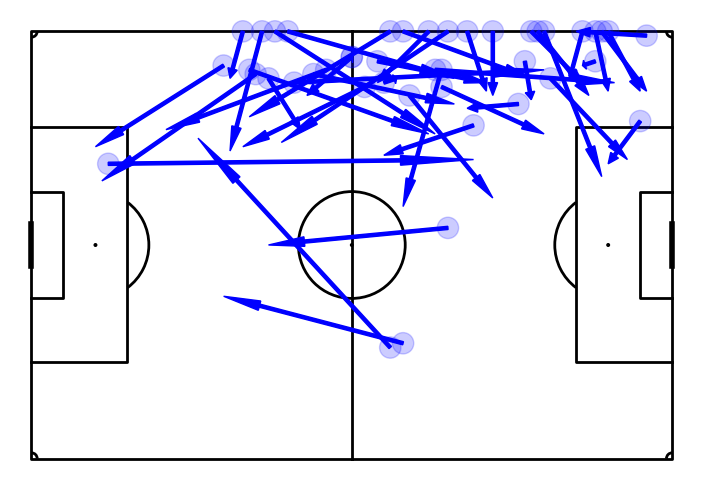

In [216]:
pitch = Pitch(line_color = "black", corner_arcs=True)
fig, ax = pitch.draw(figsize=(8, 5))

events = spadl_selected[(spadl_selected["player_id"] == player_id) & ((spadl_selected["type_name"] == "Free Kick") | (spadl_selected["type_name"] == "Pass"))]

events.loc[:, "start_x"] = events["start_x"]*1.1428
events.loc[:, "start_y"] = events["start_y"]*1.1764

events.loc[:, "end_x"] = events["end_x"]*1.1428
events.loc[:, "end_y"] = events["end_y"]*1.1764

for i, event in events.iterrows():
    x = event["start_x"]
    y = event["start_y"]
    
    passCircle=plt.Circle((x,y),2,color="blue")
    passCircle.set_alpha(.2)
    ax.add_patch(passCircle)
    
    dx = event["end_x"] - x
    dy = event["end_y"] - y
    
    passArrow=plt.Arrow(x,y,dx,dy,width=3,color="blue")
    ax.add_patch(passArrow)

**O mapa de passes trouxe mais pontos de que ele é um lateral direito, pois suas ações ofensivas são mais passes para um provável ponta, mas ao mesmo tempo ele não realizou cruzamentos para a área.**

## Questão 6
- Crie uma rede de passes de cada uma das equipes. Adapte de [6].
- O que você consegue inferir sobre a formação de cada equipe? Quais jogadores de cada equipe possuem o maior grau (tem maior soma do peso das arestas)?

In [217]:
# Como não temos informação de substituição visível

first_half = spadl_selected[(spadl_selected["period_id"] == "1H") & (spadl_selected["type_name"] == "Pass")]

first_half.loc[:, "start_x"] = first_half["start_x"]*1.1428
first_half.loc[:, "start_y"] = first_half["start_y"]*1.1764

first_half.loc[:, "end_x"] = first_half["end_x"]*1.1428
first_half.loc[:, "end_y"] = first_half["end_y"]*1.1764

russia = first_half[first_half["team_name"] == "Russia"]

results = []
for idx in russia.index:
    r = spadl_selected.loc[idx+1, ["team_name", "player_name"]]
    
    if r["team_name"] != "Russia": results.append("lost")
    else: results.append(r["player_name"])

russia.loc[:, "pass_recipient_name"] = results

arabia = first_half[~(first_half["team_name"] == "Russia")]

results = []
for idx in arabia.index:
    r = spadl_selected.loc[idx+1, ["team_name", "player_name"]]
    
    if r["team_name"] == "Russia": results.append("lost")
    else: results.append(r["player_name"])

arabia.loc[:, "pass_recipient_name"] = results

C:\Users\tonim\AppData\Local\Temp\ipykernel_19812\3588627559.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russia.loc[:, "pass_recipient_name"] = results
C:\Users\tonim\AppData\Local\Temp\ipykernel_19812\3588627559.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arabia.loc[:, "pass_recipient_name"] = results


C:\Users\tonim\AppData\Local\Temp\ipykernel_19812\1623704558.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arabia["pair_key"] = arabia.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)


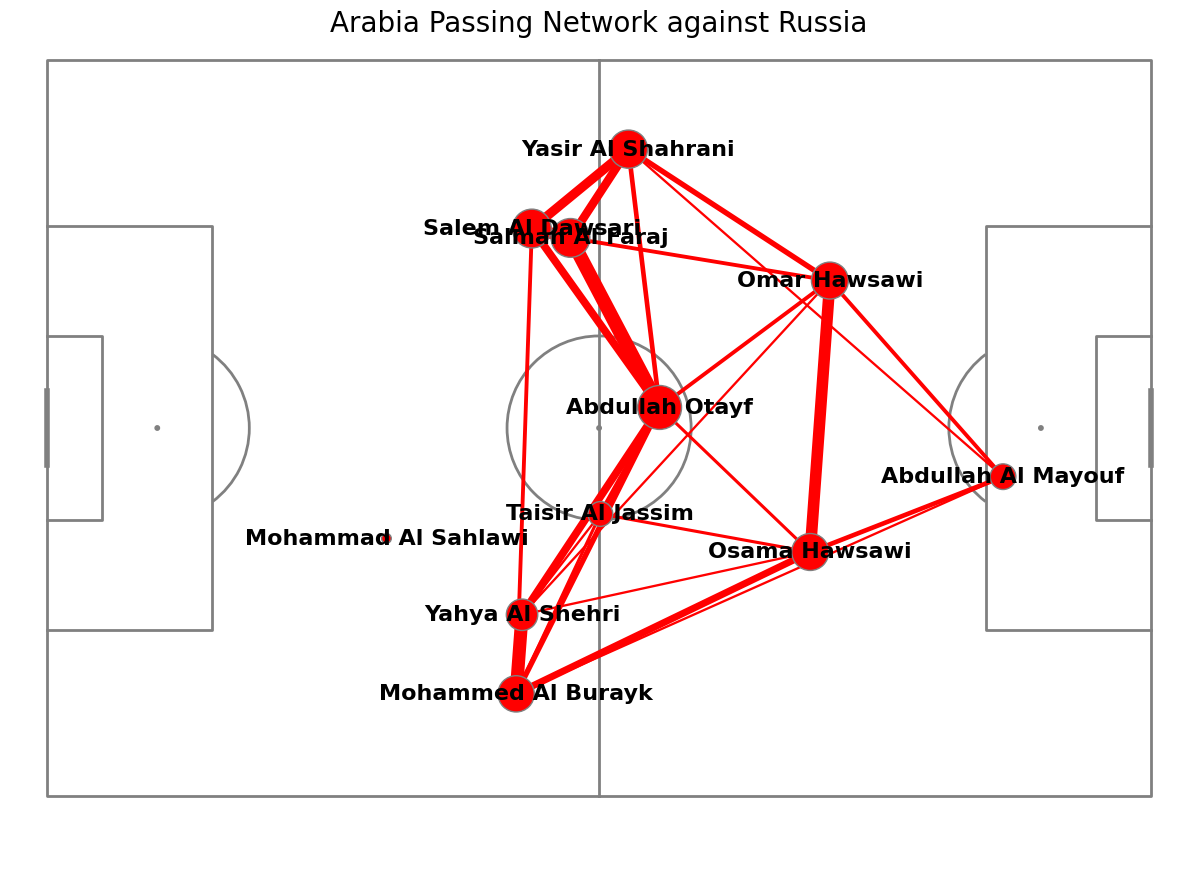

In [218]:
scatter_df = pd.DataFrame()

for i, name in enumerate(arabia["player_name"].unique()):
    passx = arabia.loc[arabia["player_name"] == name]["start_x"].to_numpy()
    recx = arabia.loc[arabia["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = arabia.loc[arabia["player_name"] == name]["start_y"].to_numpy()
    recy = arabia.loc[arabia["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = arabia.loc[arabia["player_name"] == name].count().iloc[0]

#adjust the size of a circle so that the player who made more passes
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1000)

#counting passes between players
arabia["pair_key"] = arabia.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)

lines_df = arabia.groupby(["pair_key"]).start_x.count().reset_index()
lines_df.rename({'start_x':'pass_count'}, axis='columns', inplace=True)
lines_df = lines_df[lines_df['pass_count']>2]

pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.01, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]

        if player2 == "lost": continue
            
        #take the average location of players to plot a line between them
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="red", ax = ax["pitch"])

fig.suptitle("Arabia Passing Network against Russia", fontsize = 20)
plt.show()

C:\Users\tonim\AppData\Local\Temp\ipykernel_19812\136783077.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  russia["pair_key"] = russia.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)


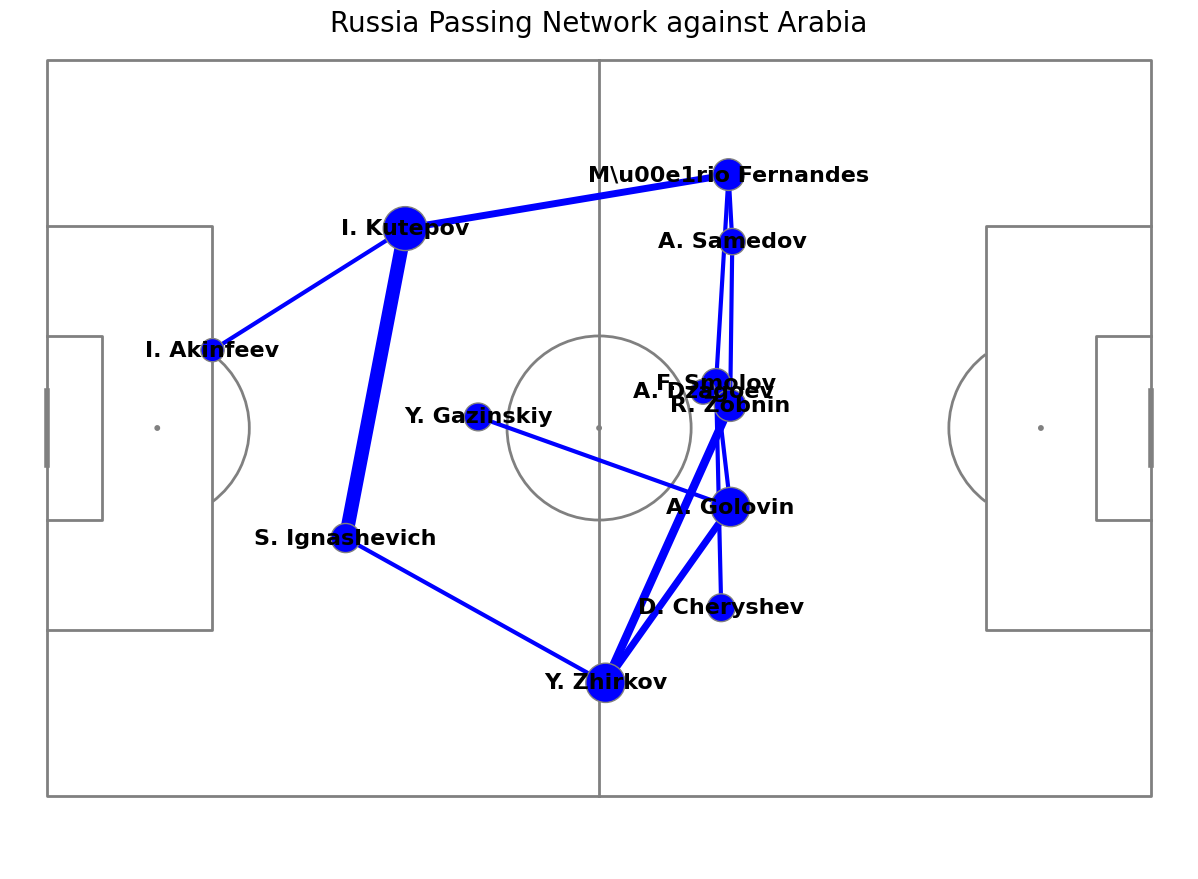

In [219]:
scatter_df = pd.DataFrame()

for i, name in enumerate(russia["player_name"].unique()):
    passx = russia.loc[russia["player_name"] == name]["start_x"].to_numpy()
    recx = russia.loc[russia["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = russia.loc[russia["player_name"] == name]["start_y"].to_numpy()
    recy = russia.loc[russia["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = russia.loc[russia["player_name"] == name].count().iloc[0]

#adjust the size of a circle so that the player who made more passes
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1000)

#counting passes between players
russia["pair_key"] = russia.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)

lines_df = russia.groupby(["pair_key"]).start_x.count().reset_index()
lines_df.rename({'start_x':'pass_count'}, axis='columns', inplace=True)
lines_df = lines_df[lines_df['pass_count']>2]

pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.01, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='blue', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]

        if player2 == "lost": continue
            
        #take the average location of players to plot a line between them
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="blue", ax = ax["pitch"])

fig.suptitle("Russia Passing Network against Arabia", fontsize = 20)
plt.show()

**Aparenta que a Arábia é um time mais coletivo, onde os jogadores trocaram mais passes entre si, e bem centralizado no campo. Entretanto, a Rússia com uma linha de frente muito forte nos passes, buscando sempre uma conexão com os pontas e os volantes, que jogaram bem mais avançado que o normal. A Arábia buscou a conexão entre linhas de diferentes formas, devido aos vértices possuirem mais arestas.**